In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

In [2]:
def voisins(arr,a):
    voisins = []
    (i,j) = a
    n,m = arr.shape
    if i+1<n and arr[i+1,j] != 1:
        voisins.append(np.array([i+1,j]))
    if i-1>= 0 and arr[i-1,j] != 1:
        voisins.append(np.array([i-1,j]))
    if j+1<m and arr[i,j+1] != 1:
        voisins.append(np.array([i,j+1]))
    if j-1 >= 0 and arr[i,j-1] != 1:
        voisins.append(np.array([i,j-1]))
    return voisins

In [3]:
def number_nodes(arr):
    return (arr != 1).sum()

In [4]:
def minimum_distance_P(d,P):
    new_d = np.copy(d)
    for (x,y) in P:
        new_d[x,y] = np.inf
    return np.array(np.unravel_index(np.argmin(new_d, axis=None), new_d.shape))

In [5]:
def dijkstra(arr):
    P=[]
    d = np.Inf*np.ones(arr.shape)
    d[0,0] = 0
    n=0
    nn = number_nodes(arr)
    predecessor ={}
    
    while n < 10000 and len(P) < nn:
        n += 1
        a = minimum_distance_P(d,P)
        P.append(a)
        for b in voisins(arr,a):
            if not (np.any(np.all(b == P, axis=1))):
                if d[tuple(b)] > d[tuple(a)] + 1:
                    d[tuple(b)] = d[tuple(a)] + 1
                    predecessor[tuple(b)] = tuple(a)
    return predecessor

In [6]:
def shortest_path(arr):
    pred = dijkstra(arr)
    A = []
    x,y = maze_num.shape
    s = (x-1,y-1)
    n=0
    while s != (0,0) and n < 100:
        A.insert(0,s)
        s = pred[s]
    a = (0,0)
    A.insert(0,a)
    return A

In [7]:
f = open('maze.mz.txt','r')
maze = f.read().split()

In [8]:
maze_num = np.zeros((101,101))
for i in range(101):
    for j in range(50):
        if maze[i][3*j] == '#':
            maze_num[i,2*j] = 1
        else:
            maze_num[i,2*j] = 0
        if maze[i][3*j+1] == '#':
            maze_num[i,2*j+1] = 1
        else:
            maze_num[i,2*j+1] = 0
    if maze[i][150] == '#':
            maze_num[i,100] = 1
    else:
            maze_num[i,100] = 0

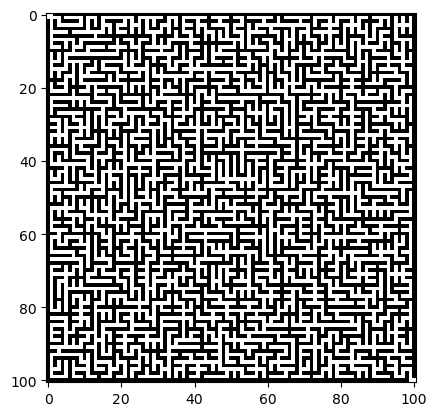

In [9]:
fig, ax = plt.subplots()
cmap = ListedColormap(["white", "black"])
im = ax.imshow(maze_num, cmap=cmap)

plt.show()

In [10]:
path = shortest_path(maze_num)

In [11]:
maze_resolved = maze_num.copy() 
for (x,y) in path:
    maze_resolved[x,y] = 2
maze_resolved

array([[2., 2., 1., ..., 1., 1., 1.],
       [0., 2., 0., ..., 1., 0., 1.],
       [1., 2., 1., ..., 1., 0., 1.],
       ...,
       [1., 0., 1., ..., 1., 2., 1.],
       [1., 0., 0., ..., 1., 2., 1.],
       [1., 1., 1., ..., 1., 2., 2.]])

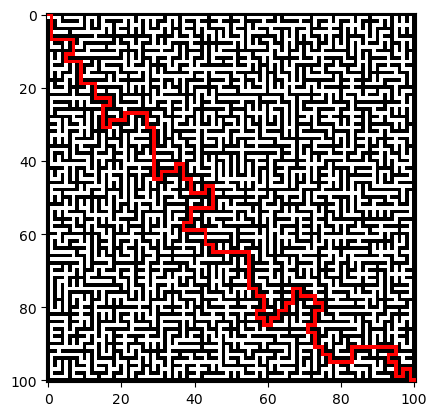

In [12]:
fig, ax = plt.subplots()
cmap = ListedColormap(["white", "black", "red"])
im = ax.imshow(maze_resolved, cmap=cmap)

plt.show()